### Note: this notebook is identical to sir-query-positional-2d.ipynb with the exception that gamma_search_bounds is set to have the same lower and upper bound, and gamma_values_to_synthesize is set to 1.

### For consistency scenarios, both of the search upper and lower bounds should be set to the same number and values to synthesize of each parameter should be set to 1.

In [85]:
%load_ext autoreload
%autoreload 2

import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model
import json
from random import randint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# initialize recording of parameter choices and true/false


# USER: set bounds
beta_search_bounds = [0.08,0.10]
gamma_search_bounds = [0.02,0.02]

In [80]:
# USER: list how many points for each parameter you'd like to synthesize

beta_values_to_synthesize = 1
gamma_values_to_synthesize = 1


In [81]:
search_points_beta = np.linspace(beta_search_bounds[0], beta_search_bounds[1], beta_values_to_synthesize)
search_points_gamma = np.linspace(gamma_search_bounds[0], gamma_search_bounds[1], gamma_values_to_synthesize)

In [82]:

# set parameters
def ps(param_synth_method):
    param_choices_true_false = []
    for i in range(len(search_points_beta)):
        beta_val = search_points_beta[i]
        for j in range(len(search_points_gamma)):
            gamma_val = search_points_gamma[j]

            # parameters
            def beta(t): return np.piecewise(t, [t>=0], [beta_val])
            def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])


            # USER: set initial conditions
            I0, R0 = 0.01, 0
            S0 = 1-I0-R0
            y0 = S0, I0, R0 # Initial conditions vector
            # USER: set simulation parameters
            dt = 5
            tstart = 0
            tend = 100
            tvect = np.arange(tstart, tend, dt)
            # simulate/solve ODEs
            sim = odeint(sir_model.SIR_model, y0, tvect, args=(beta, gamma))
            S, I, R = sim.T

            # plot results - uncomment next line to plot time series.  not recommended for large numbers of points
            # sir_model.plotSIR(tvect, S, I, R)
            # USER: write query condition.
            query_condition =  0.15 <= max(I) <= 0.16  #((0.15 <= I[10]) and I[10] <= 1.0)
            query = '1' if query_condition else '0'
            param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'assignment': query} # for "all", go through every option. for "any", only need one good parameter choice.
            param_choices_true_false.append(param_assignments)
            if param_synth_method == "any" and query == '1':
                return param_choices_true_false
    return param_choices_true_false
    
param_choices_true_false = ps("any")

In [83]:
print(param_choices_true_false)

id_number = randint(10**5, 10**6 - 1)

with open(f'sir_query_auto_1_param_{id_number}.json', 'w', encoding='utf-8') as f:
    json.dump(param_choices_true_false, f, ensure_ascii=False, indent=4)

[{'beta': 0.08, 'gamma': 0.02, 'assignment': '0'}]


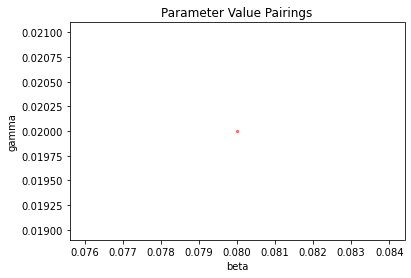

In [84]:
sir_model.plot_two_params("beta", "gamma", param_choices_true_false)
